

###**Credit Card Fraud Detection Using Machine Learning & Statistical Methods**





---




This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. I took a smaller part of the data , making sure it has the same proportion of orginal data is_fraud


*   0   ( 92.321071)
*  1    ( 7.678929)

original dataset contains 12lakh rows and 22 columns .I'm only Taking around 100,000 resulting in a shape of (97748, 22).

*   **trans_date_trans_time(Object)**: This column contains the date and time of each transaction.
*  **cc_num (numeric)**: This column represents credit card numbers, which are typically used by users for transactions.

*   **merchant (categorical)**: This column contains the names of merchants involved in the transactions.
*   **category (categorical)**: This column represents the category of each transaction. And it contains 14 unique categories.
* **amt (numeric)**: This column represents the amount of each transaction.
* **first (categorical)**: This column represents the first names of individuals associated with each transaction.
* **last (categorical)**: This column represents the last names of individuals associated with each transaction.
* **gender (categorical)**: This column represents the gender of individuals associated with each transaction.

* **street (categorical)**: This column represents the street addresses associated with each transaction.
* **city (categorical)** : This column contains the names of cities where each transaction occurred.
* **state (categorical)**: This column represents the states associated with each transaction, using two-letter state abbreviations.
* **zip (numeric)**: This column represents the ZIP codes associated with each transaction.

















In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  KFold
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
#Load dataset using pandas
sampled_df=pd.read_csv("/content/drive/MyDrive/update/cc/CC_final.csv")

In [ ]:
sampled_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
1,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0
2,2019-01-01 00:50:53,4512828414983801773,fraud_Jaskolski-Dibbert,grocery_net,16.16,Monica,Cohen,F,864 Reynolds Plains,Uledi,...,39.8936,-79.7856,328,Tree surgeon,1983-07-25,514a1b5251ca91aeab8994cf6253f04b,1325379053,39.222743,-78.839099,0
3,2019-01-01 00:57:17,378006354724784,fraud_Ankunding LLC,shopping_net,94.53,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,...,38.5095,-78.2638,395,Senior tax professional/tax inspector,1982-01-07,d513918bedeff433054b9384483bd79c,1325379437,37.846760,-79.262334,0
4,2019-01-01 01:09:57,180048185037117,"fraud_Rippin, Kub and Mann",misc_net,3.79,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,7c63dd07b14aac7dc99f4587d83dd599,1325380197,40.813669,-75.283465,0


In [ ]:
#Display the column names
sampled_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
sampled_df.shape

(97748, 22)

In [ ]:
#Checking the distribution of the target variable
sampled_df["is_fraud"].value_counts()/len(sampled_df["is_fraud"])*100

is_fraud
0    92.321071
1     7.678929
Name: count, dtype: float64

In [ ]:
#Checking for null values
sampled_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#Checking data types of all features
sampled_df.dtypes


trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
# Iterate over each column in the DataFrame
for column in sampled_df.columns:
    # Get the value counts for the current column
    value_counts = sampled_df[column].value_counts()
    # Print the column name and its value counts
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

Value counts for column 'trans_date_trans_time':
trans_date_trans_time
2019-03-24 16:07:17    2
2019-02-07 22:17:53    2
2020-03-23 20:06:06    2
2019-02-17 01:12:49    2
2020-06-05 13:22:31    2
                      ..
2019-07-12 02:53:01    1
2019-07-12 02:51:47    1
2019-07-12 02:37:10    1
2019-07-12 02:15:10    1
2020-06-21 12:07:54    1
Name: count, Length: 97617, dtype: int64

Value counts for column 'cc_num':
cc_num
345933964507467        255
2712209726293386       250
6011893664860915       240
6534628260579800       239
372520049757633        239
                      ... 
180097223252063          7
4225628813173670         7
340187018810220          7
4714017207228610634      7
4734310647841293         7
Name: count, Length: 983, dtype: int64

Value counts for column 'merchant':
merchant
fraud_Kilback LLC                        337
fraud_Cormier LLC                        312
fraud_Boyer PLC                          286
fraud_Schumm PLC                         284
fraud_Kuh

In [ ]:
sampled_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
1,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0
2,2019-01-01 00:50:53,4512828414983801773,fraud_Jaskolski-Dibbert,grocery_net,16.16,Monica,Cohen,F,864 Reynolds Plains,Uledi,...,39.8936,-79.7856,328,Tree surgeon,1983-07-25,514a1b5251ca91aeab8994cf6253f04b,1325379053,39.222743,-78.839099,0
3,2019-01-01 00:57:17,378006354724784,fraud_Ankunding LLC,shopping_net,94.53,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,...,38.5095,-78.2638,395,Senior tax professional/tax inspector,1982-01-07,d513918bedeff433054b9384483bd79c,1325379437,37.846760,-79.262334,0
4,2019-01-01 01:09:57,180048185037117,"fraud_Rippin, Kub and Mann",misc_net,3.79,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,7c63dd07b14aac7dc99f4587d83dd599,1325380197,40.813669,-75.283465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97743,2020-06-21 11:54:55,4505383113689,"fraud_Stroman, Hudson and Erdman",gas_transport,62.49,Alicia,Hawkins,F,507 John Overpass Suite 424,Harwood,...,38.8582,-76.6145,3289,Quantity surveyor,1933-03-15,4e221855f8f35f3d16fcff2c4f534269,1371815695,38.833095,-76.353375,0
97744,2020-06-21 12:01:32,3502377050801561,"fraud_Zemlak, Tillman and Cremin",personal_care,4.23,Kathleen,Martin,F,659 Nicole Cove Suite 560,New Waverly,...,30.5354,-95.4532,4993,"Scientist, biomedical",1948-11-30,91500f25c2fb389a6d6166f625975a39,1371816092,30.338912,-94.457199,0
97745,2020-06-21 12:02:13,5359543825610251,fraud_Graham and Sons,health_fitness,110.32,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,...,45.7801,-111.1439,18182,"Engineer, drilling",1975-06-29,47cf62dfb17e95973f634a2d269c7cb6,1371816133,44.875069,-111.290110,0
97746,2020-06-21 12:07:09,4158945090781624,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,5.48,Justin,Bell,M,5323 Walker Island,Pittsburgh,...,40.4308,-79.9205,687276,"Scientist, marine",1973-10-19,efdf3d21369df12af22f898d137e00a7,1371816429,40.810441,-79.181444,0


In [ ]:
#Removing  columns: 'street', 'state', 'first', 'last', 'trans_num', 'trans_date_trans_time', 'dob'.
sampled_df.drop(columns=['street','city','state','first','last',
                         'trans_num',
                         'trans_date_trans_time','dob','cc_num'],
                         axis=1,inplace=True)

In [ ]:
sampled_df.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour,year,day,month,customers_year,customers_day,customers_month
0,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0,2019,Tuesday,1,1967,Thursday,1
1,fraud_Stracke-Lemke,grocery_pos,83.07,F,98238,48.3400,-122.3456,85,"Research officer, political party",1325378050,48.682111,-122.719904,0,0,2019,Tuesday,1,1984,Saturday,9
2,fraud_Jaskolski-Dibbert,grocery_net,16.16,F,15484,39.8936,-79.7856,328,Tree surgeon,1325379053,39.222743,-78.839099,0,0,2019,Tuesday,1,1983,Monday,7
3,fraud_Ankunding LLC,shopping_net,94.53,M,22719,38.5095,-78.2638,395,Senior tax professional/tax inspector,1325379437,37.846760,-79.262334,0,0,2019,Tuesday,1,1982,Thursday,1
4,"fraud_Rippin, Kub and Mann",misc_net,3.79,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1325380197,40.813669,-75.283465,0,1,2019,Tuesday,1,1974,Friday,7


In [ ]:
sampled_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

###***Visualization***


In [ ]:
# Selecting columns of integer and float data types excluding the 'is_fraud' column
numeric_columns = sampled_df.select_dtypes(
    include=['int', 'float']).drop(columns=['is_fraud'])


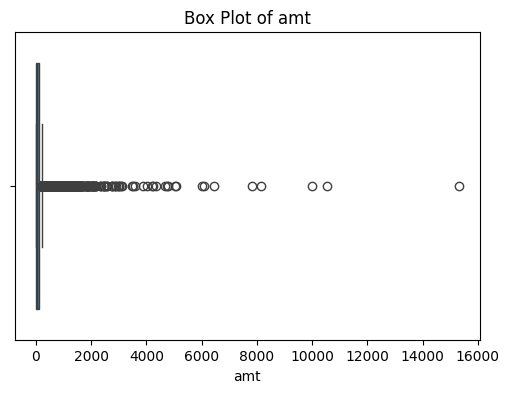

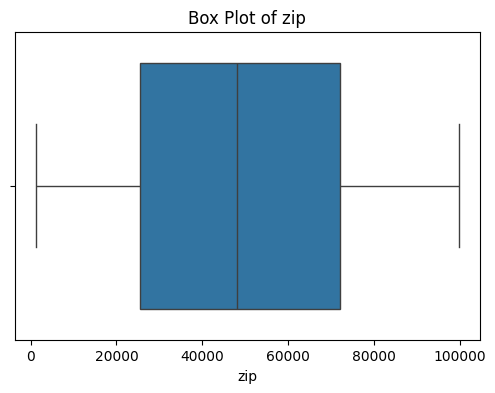

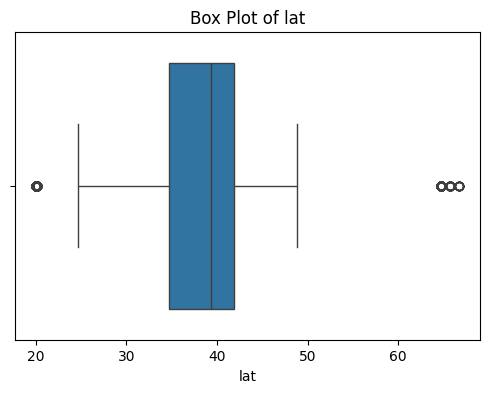

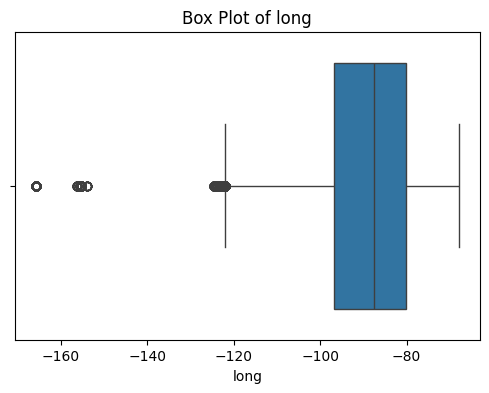

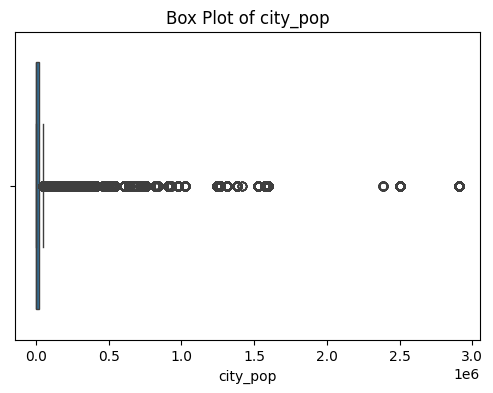

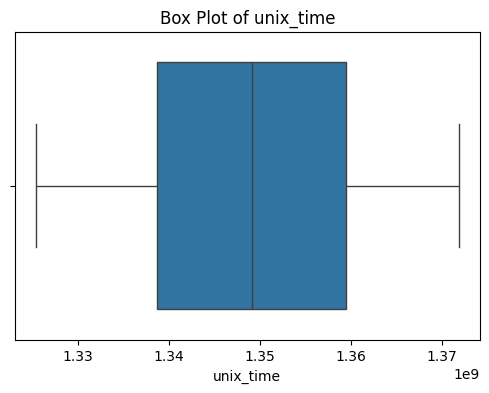

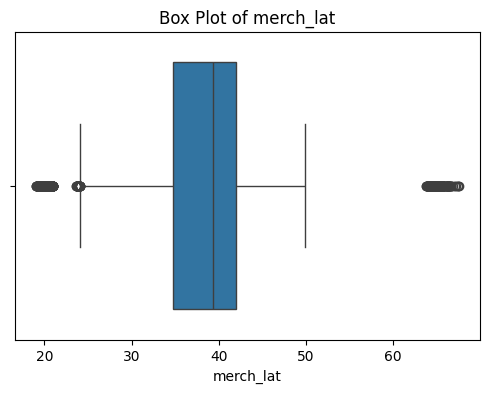

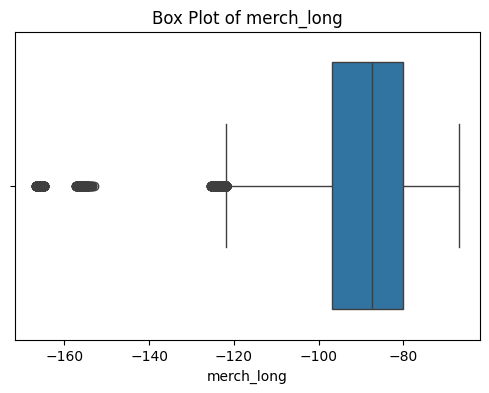

In [ ]:
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_columns[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

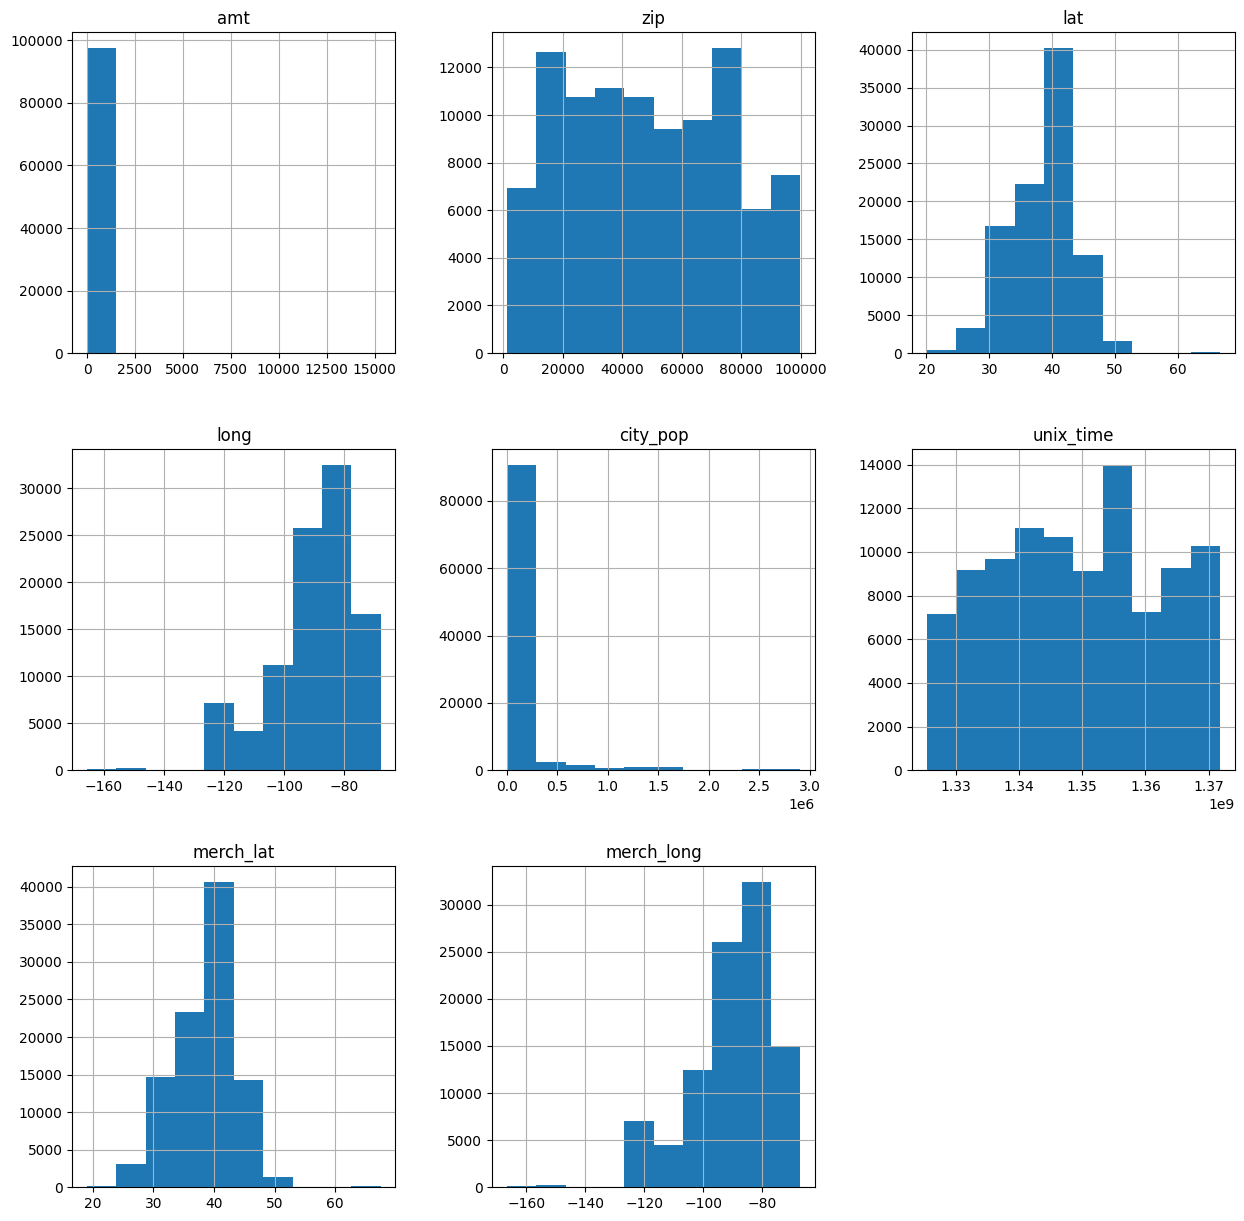

In [ ]:
numeric_columns.hist( figsize=(15, 15))
plt.show()

In [ ]:
def chebyshev_outliers(data):
    k = 3
    mean = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean - k * std_dev
    upper_bound = mean + k * std_dev
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

def chebyshev_analysis(data):
    # Define k value for Chebyshev's Inequality
    k = 3

    # Dictionary to store results
    chebyshev_results = {}

    # Iterate over each column
    for column in data.columns:
        # Mean and standard deviation
        variable_mean = np.mean(data[column])
        variable_std = np.std(data[column])

        # Calculate Chebyshev's bound
        chebyshev_bound = 1 - 1 / (k ** 2)

        # Calculate the percentage of data within the range
        within_bound = ((data[column] >= variable_mean -
                         k * variable_std) &
                        (data[column] <= variable_mean + k
                         * variable_std)).mean()

        # Store results
        chebyshev_results[column] = (chebyshev_bound, within_bound)

    return chebyshev_results

# Sample dataset (replace this with your dataset)
# Assuming `df` is your DataFrame containing the data

data = numeric_columns

# Calculate Chebyshev's analysis for each column
analysis_results = chebyshev_analysis(data)

# Display results for each column
for column, (chebyshev_bound, within_bound) in analysis_results.items():
    print(f"Column: {column}")
    print(f"k=3: Chebyshev's bound={chebyshev_bound},Percentage within bound={within_bound}")

# Find outliers in each column
outliers_per_column = {column: data.index[chebyshev_outliers(data[column])]
                       for column in data.columns}
print("Outliers per column:")
for column, outliers in outliers_per_column.items():
    print(f"{column}: {len(outliers)} outliers")
    #print(outliers)

# Find common outliers across at least two columns
common_outliers = set()
for column, outliers in outliers_per_column.items():
    for other_column, other_outliers in outliers_per_column.items():
        if column != other_column:
            common_outliers.update(outliers.intersection(other_outliers))

# Print common outliers and their count
final_outliers = list(common_outliers)
print("Common outliers across at least two columns:")
print(final_outliers)
print("Number of common outliers:", len(final_outliers))

Column: amt
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9645926259360805
Column: zip
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=1.0
Column: lat
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9962454474771862
Column: long
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9962454474771862
Column: city_pop
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9744854114662193
Column: unix_time
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=1.0
Column: merch_lat
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9962454474771862
Column: merch_long
k=3: Chebyshev's bound=0.8888888888888888,Percentage within bound=0.9962454474771862
Outliers per column:
amt: 3461 outliers
zip: 0 outliers
lat: 367 outliers
long: 367 outliers
city_pop: 2494 outliers
unix_time: 0 outliers
merch_lat: 367 outliers
merch_long: 367 outliers
Common outliers across at least two colum

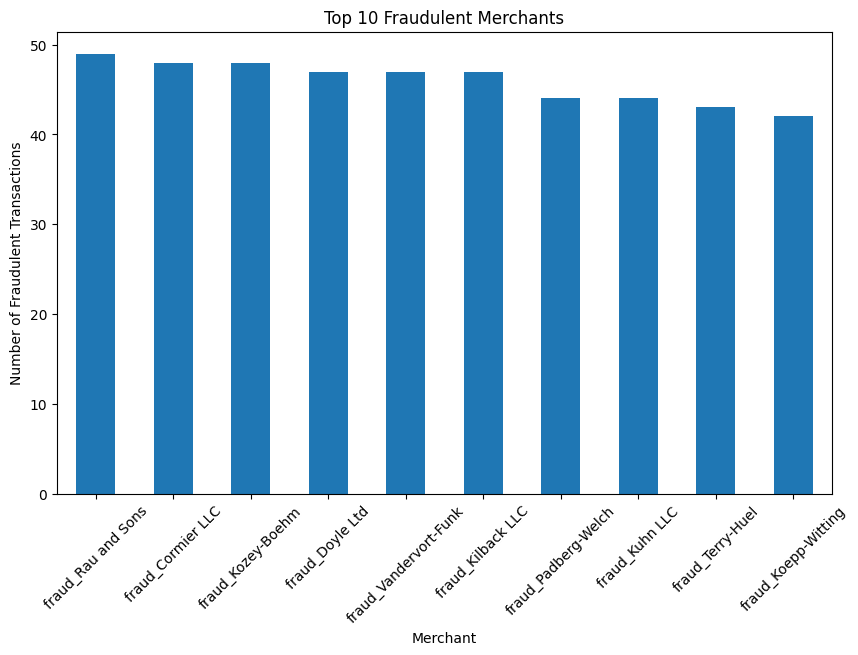

In [ ]:
# top 10 fraudulent merchants
top_10_fraudulent_merchants = sampled_df[
    sampled_df['is_fraud'] == 1]['merchant'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10,6))
top_10_fraudulent_merchants.plot(kind='bar')
plt.title('Top 10 Fraudulent Merchants')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

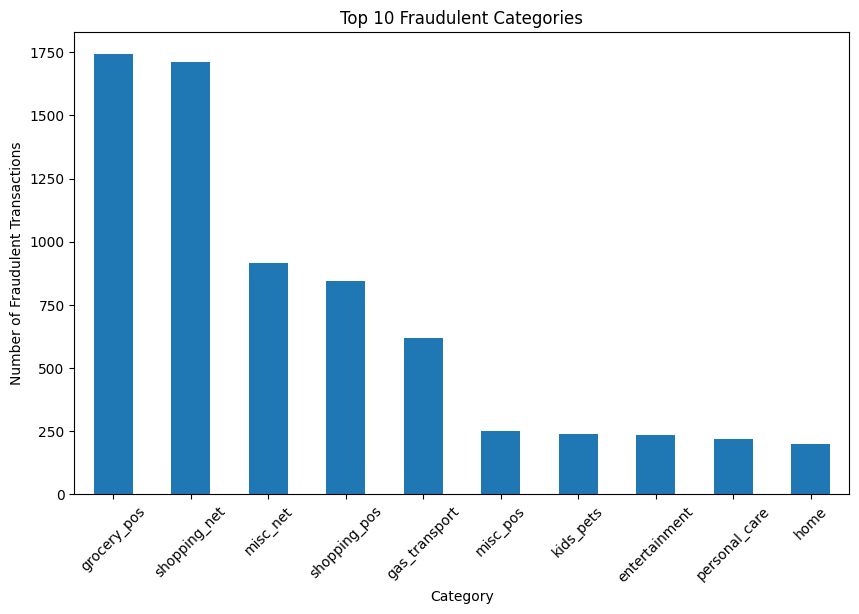

In [ ]:
#top 10 fraudulent categories
top_10_fraudulent_categories = sampled_df[sampled_df['is_fraud'] == 1]['category'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10,6))
top_10_fraudulent_categories.plot(kind='bar')
plt.title('Top 10 Fraudulent Categories')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

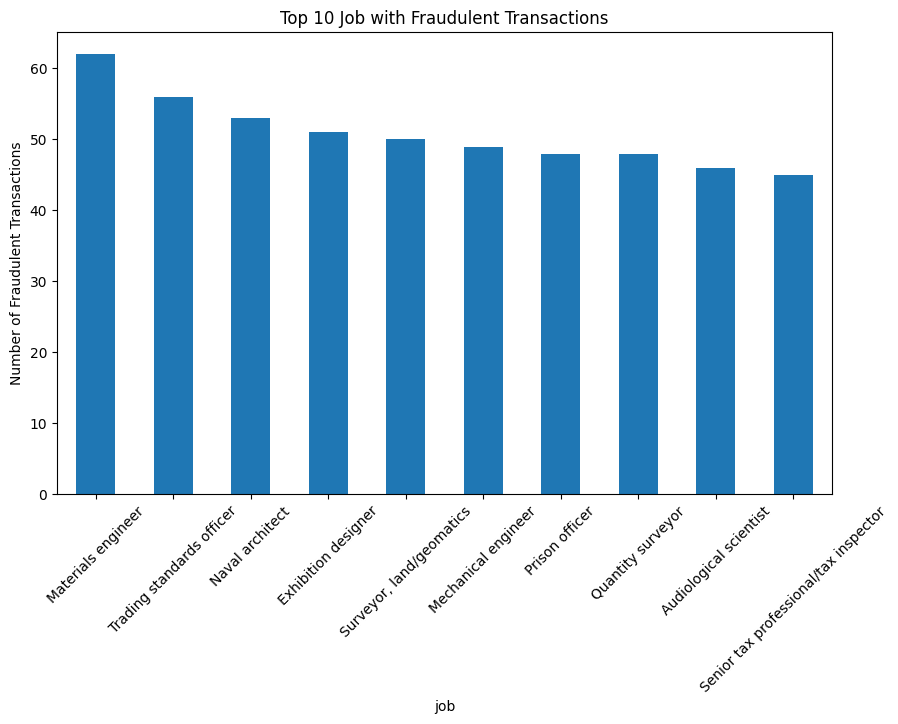

In [ ]:
# top 10 job with fraudulent transactions
top_10_fraudulent_ = sampled_df[
    sampled_df['is_fraud'] == 1]['job'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10,6))
top_10_fraudulent_.plot(kind='bar')
plt.title('Top 10 Job with Fraudulent Transactions')
plt.xlabel('job')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sampled_df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [ ]:
#One-hot encode categorical variables and drop first level
sampled_df_encoded = pd.get_dummies(sampled_df, drop_first=True,
                                    dtype="int32",
                                    columns=["category",'gender'])

In [ ]:
#One-hot encode categorical variables and drop first level
sampled_df_encoded = pd.get_dummies(sampled_df, drop_first=True,
                                    dtype="int32",
                                    columns=["category",'gender'])
# Perform frequency encoding for 'merchant' column
freq_encoding_merchant = sampled_df_encoded['merchant'].value_counts()
sampled_df_encoded['merchant'] = sampled_df_encoded['merchant'].map(freq_encoding_merchant)

# Perform frequency encoding for 'job' column
freq_encoding_job = sampled_df_encoded['job'].value_counts()
sampled_df_encoded['job'] = sampled_df_encoded['job'].map(freq_encoding_job)

num_cols = ['merchant', 'zip', 'lat', 'long', 'city_pop', 'job','amt',
            'unix_time','merch_lat', 'merch_long']
scaler = StandardScaler()
sampled_df_encoded[num_cols] =scaler.fit_transform(sampled_df_encoded[num_cols])

# Separating features (X) and target variable (Y)
X = sampled_df_encoded.drop('is_fraud', axis=1)
Y = sampled_df_encoded['is_fraud']
# Spliting the dataset into training and testing sets with stratification based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=42)
# Reseting index for X_train and y_train to ensure alignment after splitting
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize SMOTE with a sampling strategy to oversample minority class by 30%
smote = SMOTE(sampling_strategy=0.3, k_neighbors=5)

# Apply SMOTE to the training set
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)



In [ ]:
sampled_df_encoded.columns

Index(['trans_date_trans_time', 'merchant', 'amt', 'first', 'last', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

In [ ]:
sampled_df_encoded.head()

,trans_date_trans_time,merchant,amt,first,last,street,city,state,zip,lat,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,0,0,0,0,0,0,0,0,0,1
1,2019-01-01 00:34:10,fraud_Stracke-Lemke,83.07,Sharon,Johnson,7202 Jeffrey Mills,Conway,WA,98238,48.3400,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:50:53,fraud_Jaskolski-Dibbert,16.16,Monica,Cohen,864 Reynolds Plains,Uledi,PA,15484,39.8936,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:57:17,fraud_Ankunding LLC,94.53,Christopher,Matthews,433 John Heights Apt. 849,Etlan,VA,22719,38.5095,...,0,0,0,0,0,0,1,0,0,1
4,2019-01-01 01:09:57,"fraud_Rippin, Kub and Mann",3.79,Mary,Wall,2481 Mills Lock,Plainfield,NJ,7060,40.6152,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Perform frequency encoding for 'merchant' column
freq_encoding_merchant = sampled_df_encoded['merchant'].value_counts()
sampled_df_encoded['merchant'] = sampled_df_encoded['merchant'].map(freq_encoding_merchant)

# Perform frequency encoding for 'job' column
freq_encoding_job = sampled_df_encoded['job'].value_counts()
sampled_df_encoded['job'] = sampled_df_encoded['job'].map(freq_encoding_job)

In [ ]:
sampled_df_encoded.columns

Index(['merchant', 'amt', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

In [ ]:
sampled_df_encoded.head()

,merchant,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,202,45.00,M,59632,46.2306,-112.1138,1939,197,1325376076,47.034331,...,0,0,0,0,0,0,0,0,0,0
1,196,83.07,F,98238,48.3400,-122.3456,85,273,1325378050,48.682111,...,1,0,0,0,0,0,0,0,0,0
2,61,16.16,F,15484,39.8936,-79.7856,328,238,1325379053,39.222743,...,0,0,0,0,0,0,0,0,0,0
3,179,94.53,M,22719,38.5095,-78.2638,395,346,1325379437,37.846760,...,0,0,0,0,0,0,0,1,0,0
4,117,3.79,F,7060,40.6152,-74.4150,71485,210,1325380197,40.813669,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
sampled_df_encoded.iloc[:,8:]

,merch_lat,merch_long,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,47.034331,-112.561071,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,48.682111,-122.719904,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,39.222743,-78.839099,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,37.846760,-79.262334,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,40.813669,-75.283465,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97743,38.833095,-76.353375,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
97744,30.338912,-94.457199,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97745,44.875069,-111.290110,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
97746,40.810441,-79.181444,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
len(sampled_df_encoded.columns)

25

## **Scaling the data (Standardization)**

In [ ]:
num_cols = ['merchant', 'zip', 'lat', 'long', 'city_pop', 'job','amt',
            'unix_time','merch_lat', 'merch_long']
scaler = StandardScaler()
sampled_df_encoded[num_cols] =scaler.fit_transform(sampled_df_encoded[num_cols])

In [ ]:
sampled_df_encoded.head()

,merchant,amt,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.043242,-0.268584,0.405562,1.513417,-1.590543,-0.287135,-0.635420,-1.844078,1.661134,-1.621308,...,0,0,0,0,0,0,0,0,0,1
1,0.906147,-0.093394,1.837571,1.929436,-2.331998,-0.293219,-0.126329,-1.843925,1.984023,-2.356741,...,0,0,0,0,0,0,0,0,0,0
2,-2.178487,-0.401299,-1.232015,0.263626,0.752144,-0.292422,-0.360779,-1.843847,0.130424,0.819941,...,0,0,0,0,0,0,0,0,0,0
3,0.517712,-0.040658,-0.963648,-0.009348,0.862423,-0.292202,0.362665,-1.843817,-0.139205,0.789301,...,0,0,0,0,0,0,1,0,0,1
4,-0.898935,-0.458223,-1.544485,0.405941,1.141329,-0.058914,-0.548339,-1.843758,0.442172,1.077345,...,0,0,0,1,0,0,0,0,0,0


# **Data Partitioning**

In [ ]:
# Separating features (X) and target variable (Y)
X = sampled_df_encoded.drop('is_fraud', axis=1)
Y = sampled_df_encoded['is_fraud']

# **Train Test Split(Stratified Sampling)**
**Stratified sampling should be applied to both the training and testing sets to ensure that the class distribution is preserved in both sets.**

In [ ]:
# Spliting the dataset into training and testing sets with stratification based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=42)

In [ ]:
# Reseting index for X_train and y_train to ensure alignment after splitting
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
# Calculating the percentage distribution of target variable in training set
y_train.value_counts() / len(y_train) * 100


is_fraud
0    92.320775
1     7.679225
Name: count, dtype: float64

In [ ]:
# Calculating the percentage distribution of target variable in testing set
y_test.value_counts()/len(y_test)*100

is_fraud
0    92.322251
1     7.677749
Name: count, dtype: float64

# **Smote**

In [ ]:
# Initialize SMOTE with a sampling strategy to oversample minority class by 30%
smote = SMOTE(sampling_strategy=0.3, k_neighbors=5)

# Apply SMOTE to the training set
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts(normalize=True)

is_fraud
0    0.923208
1    0.076792
Name: proportion, dtype: float64

In [ ]:
y_train_sm.value_counts(normalize=True)

is_fraud
0    0.769238
1    0.230762
Name: proportion, dtype: float64

# **10-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Function for classification metrics
def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * precision * recall / (precision + recall)
    return accuracy, recall, precision, f1


def k_fold_cross_validation_with_tuning(classifier, param_grid,
                                        X_train,y_train, X_test,
                                        y_test, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_metrics = []
    test_metrics = []
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    f1_scores = []
    auc_scores = []

    # Convert X_train, y_train, X_test, y_test to numpy arrays
    # to ensure indexing compatibility
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)


    for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(classifier, param_grid, cv=5)
        grid_search.fit(X_train_fold, y_train_fold)

        best_classifier = grid_search.best_estimator_

        # Validate on the validation set
        val_predictions = best_classifier.predict(X_val_fold)
        val_conf_matrix = confusion_matrix(y_val_fold, val_predictions)
        val_accuracy, val_recall, val_precision, val_f1 = calculate_metrics(val_conf_matrix)
        val_auc = roc_auc_score(y_val_fold, val_predictions)

        fold_metrics.append({'Fold': fold,
                             'Validation Accuracy': val_accuracy,
                             'Validation Recall': val_recall,
                             'Validation Precision': val_precision,
                             'Validation F1 Score': val_f1,
                             'Validation AUC': val_auc,
                             'Best Parameters': grid_search.best_params_})

        # Test the best model on the test set
        test_predictions = best_classifier.predict(X_test)
        test_conf_matrix = confusion_matrix(y_test, test_predictions)
        test_accuracy, test_recall, test_precision, test_f1 = calculate_metrics(test_conf_matrix)
        test_auc = roc_auc_score(y_test, test_predictions)

        test_metrics.append({'Fold': fold,
                             'Test Accuracy': test_accuracy,
                             'Test Recall': test_recall,
                             'Test Precision': test_precision,
                             'Test F1 Score': test_f1,
                             'Test AUC': test_auc})

        # Print metrics for each fold and test
        print(f"Fold {fold} Metrics:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Validation Confusion matrix: {val_conf_matrix}")
        print(f"Validation Accuracy: {val_accuracy}")
        print(f"Validation Recall: {val_recall}")
        print(f"Validation Precision: {val_precision}")
        print(f"Validation F1 Score: {val_f1}")
        print(f"Validation AUC: {val_auc}")

        print(f"Test Metrics:")
        print(f"Test Confusion matrix: {test_conf_matrix}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Test Recall: {test_recall}")
        print(f"Test Precision: {test_precision}")
        print(f"Test F1 Score: {test_f1}")
        print(f"Test AUC: {test_auc}")
        print("-" * 30)

        # Collect metrics for computing mean and standard deviation
        accuracy_scores.append(test_accuracy)
        recall_scores.append(test_recall)
        precision_scores.append(test_precision)
        f1_scores.append(test_f1)
        auc_scores.append(test_auc)

    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_recall = np.mean(recall_scores)
    mean_precision = np.mean(precision_scores)
    mean_f1 = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores)

    # Calculate standard deviation of metrics
    std_accuracy = np.std(accuracy_scores)
    std_recall = np.std(recall_scores)
    std_precision = np.std(precision_scores)
    std_f1 = np.std(f1_scores)
    std_auc = np.std(auc_scores)


    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Mean Recall: {mean_recall}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Mean F1 Score: {mean_f1}")
    print(f"Mean AUC: {mean_auc}")

    print(f"Standard Deviation of Accuracy: {std_accuracy}")
    print(f"Standard Deviation of Recall: {std_recall}")
    print(f"Standard Deviation of Precision: {std_precision}")
    print(f"Standard Deviation of F1 Score: {std_f1}")
    print(f"Standard Deviation of AUC: {std_auc}")

    return fold_metrics, test_metrics


# **Logistic Regression**

In [ ]:
# Instantiate the logistic regression
logreg = LogisticRegression()

In [ ]:
# Defining hyperparameter grid for Logistic Regression
logistic_params = {
    #'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2'],# Penalty type
    'max_iter': [500,900] # no. of iterations
}


# Other hyperparameters you might consider:
# 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
# Algorithm for optimization
# 'class_weight': [None, 'balanced'],  # Weights associated with classes

In [ ]:
fold_metrics, test_metrics = k_fold_cross_validation_with_tuning(logreg,
                                                                 logistic_params,
                                                                 X_train_sm, y_train_sm,
                                                                 X_test, y_test)


Fold 1 Metrics:
Best Parameters: {'max_iter': 500, 'penalty': 'l2'}
Validation Confusion matrix: [[7241  117]
 [ 556 1471]]
Validation Accuracy: 0.9282898241875333
Validation Recall: 0.7257030093734583
Validation Precision: 0.9263224181360201
Validation F1 Score: 0.8138312586445365
Validation AUC: 0.8549009746513935
Test Metrics:
Test Confusion matrix: [[17796   253]
 [  405  1096]]
Test Accuracy: 0.9663427109974424
Test Recall: 0.7301798800799467
Test Precision: 0.8124536693847294
Test F1 Score: 0.7691228070175439
Test AUC: 0.8580812414971178
------------------------------
Fold 2 Metrics:
Best Parameters: {'max_iter': 500, 'penalty': 'l2'}
Validation Confusion matrix: [[7144  107]
 [ 554 1580]]
Validation Accuracy: 0.9295684603090038
Validation Recall: 0.7403936269915652
Validation Precision: 0.9365737996443391
Validation F1 Score: 0.8270086364825963
Validation AUC: 0.8628185208464929
Test Metrics:
Test Confusion matrix: [[17797   252]
 [  405  1096]]
Test Accuracy: 0.9663938618925831

# **Decision Tree**

In [ ]:
decision_tree= DecisionTreeClassifier()

In [ ]:
#hyperparameter grid for Decision Tree
param_grid_dec = {
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 3],  # Minimum samples required to split a node
    'min_samples_leaf': [2,3] # Minimum samples required at a leaf node

}

In [ ]:
fold_metrics, test_metrics =k_fold_cross_validation_with_tuning(decision_tree,param_grid_dec,
                                    X_train_sm, y_train_sm,
                                      X_test, y_test)

Fold 1 Metrics:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation Confusion matrix: [[7247  111]
 [ 164 1863]]
Validation Accuracy: 0.9706979222163026
Validation Recall: 0.9190922545633942
Validation Precision: 0.9437689969604863
Validation F1 Score: 0.9312671832041989
Validation AUC: 0.952003316735353
Test Metrics:
Test Confusion matrix: [[17735   314]
 [  174  1327]]
Test Accuracy: 0.9750383631713555
Test Recall: 0.8840772818121253
Test Precision: 0.8086532602071907
Test F1 Score: 0.8446849140674729
Test AUC: 0.9333400980505028
------------------------------
Fold 2 Metrics:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}
Validation Confusion matrix: [[7113  138]
 [ 146 1988]]
Validation Accuracy: 0.9697389451251998
Validation Recall: 0.9315838800374883
Validation Precision: 0.9350893697083725
Validation F1 Score: 0.9333333333333332
Validation AUC: 0.9562760111813424
Test Metrics:
Test Confusion matrix: [[177

# **Decision Tree(If -Then rules)**

In [ ]:
# Train the model
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np

decision_tree = DecisionTreeClassifier(min_samples_split=3,
                                       min_samples_leaf=3,max_depth = 20)
decision_tree.fit(X_train_sm, y_train_sm)

def get_rules(tree, feature_names, target_names):
    tree_ = tree.tree_
    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            feature_index = tree_.feature[node]

            if feature_index >= 0:  # Check if the feature is defined
                threshold = tree_.threshold[node]
                feature_name = feature_names[feature_index]
                p1, p2 = list(path), list(path)
                p1 += [f"({feature_name} <= {np.round(threshold, 3)})"]
                recurse(tree_.children_left[node], p1, paths)
                p2 += [f"({feature_name} > {np.round(threshold, 3)})"]
                recurse(tree_.children_right[node], p2, paths)
            else:
                recurse(tree_.children_left[node], path, paths)
                recurse(tree_.children_right[node], path, paths)

        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        classes = path[-1][0][0]
        max_class = np.argmax(classes)
        proba = np.round(100.0 * classes[max_class] / np.sum(classes), 2)
        rule += f"class: {target_names[max_class]} (proba: {proba}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules.append(rule)

    return rules

# Assuming you already have X_train, y_train defined
feature_names = X.columns.tolist()  # Get column names as feature names
target_names = np.unique(Y)

rules = get_rules(decision_tree, feature_names, target_names)
for r in rules:
    print(r)
print("Number of rules generated:", len(rules))


if (amt <= 0.692) and (amt > -0.364) and (amt <= 0.584) and (category_food_dining <= 0.5) and (job > -1.763) and (amt <= 0.472) and (merchant > -0.147) and (merch_lat <= 5.433) and (city_pop <= 2.422) and (merch_long > -4.787) and (merchant <= 1.797) and (category_personal_care <= 0.5) and (amt <= 0.426) and (amt > -0.358) and (city_pop <= 1.367) and (long > -2.328) and (merch_lat > -2.176) and (amt > -0.349) and (category_misc_pos <= 0.5) and (merchant > 0.393) then class: 0 (proba: 99.99%) | based on 16,386 samples
if (amt <= 0.692) and (amt <= -0.364) and (category_gas_transport <= 0.5) and (amt <= -0.396) and (category_grocery_net <= 0.5) and (amt <= -0.443) and (category_kids_pets <= 0.5) and (merchant > -2.067) and (amt <= -0.444) and (amt <= -0.447) and (merchant > -2.053) and (unix_time <= 1.739) and (merchant <= 2.94) and (amt <= -0.453) then class: 0 (proba: 100.0%) | based on 7,748 samples
if (amt <= 0.692) and (amt > -0.364) and (amt <= 0.584) and (category_food_dining <= 0

## **Multi Layer Perceptron**

In [ ]:
MLPC = MLPClassifier()

# hyperparameter grid for Multi-Layer Perceptron Classifier (MLPC)
MLPC_params = {
    'hidden_layer_sizes': [(20,)],
    #'activation': ['logistic','relu'],
    'max_iter': [500]
}

In [ ]:
fold_metrics, test_metrics = k_fold_cross_validation_with_tuning(MLPC,MLPC_params,X_train_sm, y_train_sm,X_test, y_test)

Fold 1 Metrics:
Best Parameters: {'hidden_layer_sizes': (20,), 'max_iter': 500}
Validation Confusion matrix: [[7291   67]
 [ 234 1793]]
Validation Accuracy: 0.9679275439531166
Validation Recall: 0.8845584607794771
Validation Precision: 0.9639784946236559
Validation F1 Score: 0.9225623874453306
Validation AUC: 0.937726362762666
Test Metrics:
Test Confusion matrix: [[17866   183]
 [  189  1312]]
Test Accuracy: 0.9809718670076726
Test Recall: 0.8740839440373085
Test Precision: 0.8775919732441472
Test F1 Score: 0.8758344459279038
Test AUC: 0.9319724390805413
------------------------------
Fold 2 Metrics:
Best Parameters: {'hidden_layer_sizes': (20,), 'max_iter': 500}
Validation Confusion matrix: [[7147  104]
 [ 206 1928]]
Validation Accuracy: 0.9669685668620138
Validation Recall: 0.9034676663542643
Validation Precision: 0.9488188976377953
Validation F1 Score: 0.9255880940950552
Validation AUC: 0.9445624085460467
Test Metrics:
Test Confusion matrix: [[17799   250]
 [  170  1331]]
Test Accur

# **Paired T-test for comparing and selecting the best model**





In [ ]:
from scipy import stats
import numpy as np

def compare_classifiers(classifiers_auc_mean_std, alpha=0.01):
    """
    Perform a paired t-test to compare the AUC scores of multiple classifiers.

    Parameters:
    classifiers_auc_mean_std (dict): Dictionary containing mean and standard deviation of AUC scores for each classifier.
                                    Keys are classifier names, and values are tuples of (mean, std).
    alpha (float): Significance level for hypothesis testing.

    Returns:
    dict: Dictionary containing mean AUC scores, standard deviations, t-statistic, p-value, decision, and best model for each pair of classifiers.
    """
    results = {}
    classifiers = list(classifiers_auc_mean_std.keys())
    n_classifiers = len(classifiers)

    # Perform pairwise comparison
    for i in range(n_classifiers):
        for j in range(i+1, n_classifiers):
            classifier1 = classifiers[i]
            classifier2 = classifiers[j]
            mean1, std1 = classifiers_auc_mean_std[classifier1]
            mean2, std2 = classifiers_auc_mean_std[classifier2]

            # Perform paired t-test
            std_err_diff = np.sqrt((std1 ** 2 + std2 ** 2) / 10)  # Standard error of the difference
            t_statistic = (mean1 - mean2) / std_err_diff

            # Calculate degrees of freedom
            dof = 10 + 10 - 2  # Degrees of freedom for paired samples

            # Calculate p-value
            p_value = stats.t.sf(np.abs(t_statistic), dof) * 2  # two-tailed test

            # Define null hypothesis and alternative hypothesis
            null_hypothesis = "There is no difference in AUC scores between " + classifier1 + " and " + classifier2 + "."
            alternative_hypothesis = "There is a difference in AUC scores between " + classifier1 + " and " + classifier2 + "."

            # Check if p-value is less than alpha
            if p_value < alpha:
                decision = "Reject the null hypothesis. There is a significant difference in AUC scores."
                significant_model = classifier1 if mean1 > mean2 else classifier2
            else:
                decision = "Fail to reject the null hypothesis. There is no significant difference in AUC scores."
                significant_model = None

            # Determine the best model
            best_model = classifier1 if mean1 > mean2 else classifier2

            # Store results
            results[(classifier1, classifier2)] = {
                'Mean AUC Score (' + classifier1 + ')': mean1,
                'Standard Deviation (' + classifier1 + ')': std1,
                'Mean AUC Score (' + classifier2 + ')': mean2,
                'Standard Deviation (' + classifier2 + ')': std2,
                't-statistic': t_statistic,
                'p-value': p_value,
                'Degrees of Freedom': dof,
                'Alpha': alpha,
                'Null Hypothesis': null_hypothesis,
                'Alternative Hypothesis': alternative_hypothesis,
                'Decision': decision,
                'Significant Model': significant_model,
                'Best Model': best_model
            }

    return results

# Example usage:
# Replace classifier_auc_mean_std with actual mean and std of AUC scores obtained for each classifier.
classifiers_auc_mean_std =  {
    'Logistic Regression': (0.8579,0.00018),
    'Decision Tree': (0.9742,0.0028),
    'MLP': (0.9344, 0.002)}

results = compare_classifiers(classifiers_auc_mean_std)
for pair, metrics in results.items():
    print("Comparing", pair[0], "and", pair[1])
    for metric, value in metrics.items():
        print(metric + ":", value)
    if metrics['Decision'] == "Reject the null hypothesis. There is a significant difference in AUC scores.":
        print("One of the models in the pair is statistically significant.")
    else:
        print("Both models in the pair are not significant.")
    print("\n")


Comparing Logistic Regression and Decision Tree
Mean AUC Score (Logistic Regression): 0.8579
Standard Deviation (Logistic Regression): 0.00018
Mean AUC Score (Decision Tree): 0.9742
Standard Deviation (Decision Tree): 0.0028
t-statistic: -131.07689297646706
p-value: 2.794917068788039e-28
Degrees of Freedom: 18
Alpha: 0.01
Null Hypothesis: There is no difference in AUC scores between Logistic Regression and Decision Tree.
Alternative Hypothesis: There is a difference in AUC scores between Logistic Regression and Decision Tree.
Decision: Reject the null hypothesis. There is a significant difference in AUC scores.
Significant Model: Decision Tree
Best Model: Decision Tree
One of the models in the pair is statistically significant.


Comparing Logistic Regression and MLP
Mean AUC Score (Logistic Regression): 0.8579
Standard Deviation (Logistic Regression): 0.00018
Mean AUC Score (MLP): 0.9344
Standard Deviation (MLP): 0.002
t-statistic: -120.47020021551504
p-value: 1.274358676152417e-27
De

**Observations: Decision Tree is a significant model**

**By considering all the tie-breakers:**

**Numerically (mean_auc : 0.97) and Statistically Decision Tree is significant.**

**Decision Tree is a transparent model, which can generate if - then rules.**

**And Computationally less expensive.**  

# **Naive Bayes**

In [ ]:
nb_model_best=k_fold_cross_validation_hyperparameters(nb_model,param_grid_naive,X_train_balanced, y_train_balanced,X_test_sc, y_test_split)

# **Random Forest**

In [ ]:
!pip install tensorflow
!pip install pyod
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from pyod.models.auto_encoder import AutoEncoder

from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.0-py3-none-any.whl size=196324 sha256=eca7f75230487d4478de7ed50e6225d91addb74eebde62458532337c160e7240
  Stored in directory: /root/.cache/pip/wheels/15/0e/91/96b270e6741d4eece88727489411330226ff47ac1cb9ea0097
Successfully built pyod


# **One Class Classification**

In [ ]:
# Function for classification metrics
def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * precision * recall / (precision + recall)
    auc = (recall+specificity)/2


    return accuracy, recall, specificity, precision, f1, auc

def evaluate_metrics(X_test,y_test):

        test_predictions = model.predict(X_test)
        test_conf_matrix = confusion_matrix(y_test, test_predictions)
        test_accuracy, test_recall, test_specificity, test_precision,test_f1, test_auc = calculate_metrics(test_conf_matrix)

        print(f"Test Metrics:")
        print(f"Test Confusion matrix: {test_conf_matrix}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Test Recall: {test_recall}")
        print(f"Test Specificity: {test_specificity}")
        print(f"Test Precision: {test_precision}")
        print(f"Test F1 Score: {test_f1}")
        print(f"Test AUC: {test_auc}")

        return

In [ ]:
# Step 1: Separate majority and minority class observations
majority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 0]
minority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 1]

print(majority_df.shape,minority_df.shape)

# Step 2: Train-test split on majority class DataFrame
train_set, test_set = train_test_split(majority_df, test_size=0.1, random_state=42)

# Step 3: Drop the target column from the training set
X_train = train_set.drop(columns=['is_fraud'])
y_train = train_set['is_fraud']

print(train_set.shape,test_set.shape)

# Step 4: Combine minority class DataFrame with the test set
combined_test_set = pd.concat([test_set, minority_df], axis=0)

# Step 5: Drop the target column from the combined test set
X_test = combined_test_set.drop(columns=['is_fraud'])
y_test = combined_test_set['is_fraud']

print(combined_test_set.shape)

print(combined_test_set.is_fraud.value_counts())


# define occ model
model = OneClassSVM(gamma="scale",nu=0.05)

model.fit(X_train)

# Predictions on test set (contains  class 0(non-fraudalent) and class 1(fraud)
y_pred = model.predict(X_test)

# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

print(y_test.value_counts())

# Count of outliers and inliers
Fraud_count = (y_pred == -1).sum()
Non_Fraud_count = (y_pred == 1).sum()

print(f"Fraud Count: {Fraud_count}")
print(f"Non-Fraud Count: {Non_Fraud_count}")


(90242, 25) (7506, 25)
(81217, 25) (9025, 25)
(16531, 25)
is_fraud
0    9025
1    7506
Name: count, dtype: int64
is_fraud
 1    9025
-1    7506
Name: count, dtype: int64
Fraud Count: 4234
Non-Fraud Count: 12297


In [ ]:
evaluate_metrics(X_test,y_test)

Test Metrics:
Test Confusion matrix: [[3722 3784]
 [ 512 8513]]
Test Accuracy: 0.7401246143608977
Test Recall: 0.9432686980609418
Test Specificity: 0.49586997069011457
Test Precision: 0.6922826705700578
Test F1 Score: 0.7985179626676673
Test AUC: 0.7195693343755282


# **Isolation Forest**

In [ ]:
# Step 1: Separate majority and minority class observations
majority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 0]
minority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 1]

print(majority_df.shape,minority_df.shape)

# Step 1: Train-test split on majority class DataFrame
train_set, test_set = train_test_split(majority_df, test_size=0.1,
                                       random_state=42)

# Step 2: Drop the target column from the training set
X_train = train_set.drop(columns=['is_fraud'])
y_train = train_set['is_fraud']

print(train_set.shape,test_set.shape)

# Step 3: Combine minority class DataFrame with the test set
combined_test_set = pd.concat([test_set, minority_df], axis=0)

# Step 4: Drop the target column from the combined test set
X_test = combined_test_set.drop(columns=['is_fraud'])
y_test = combined_test_set['is_fraud']

print(combined_test_set.shape)

print(combined_test_set.is_fraud.value_counts())


# define IsolationForest model
model = IsolationForest(contamination= 0.05)

model.fit(X_train)

# Predictions on test set (contains  class0(non-fraudalent) and class1(fraud)
y_pred = model.predict(X_test)

# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

print(y_test.value_counts())

# Count of outliers and inliers
Fraud_count = (y_pred == -1).sum()
Non_Fraud_count = (y_pred == 1).sum()

print(f"Fraud Count: {Fraud_count}")
print(f"Non-Fraud Count: {Non_Fraud_count}")


(90242, 25) (7506, 25)
(81217, 25) (9025, 25)
(16531, 25)
is_fraud
0    9025
1    7506
Name: count, dtype: int64
is_fraud
 1    9025
-1    7506
Name: count, dtype: int64
Fraud Count: 2110
Non-Fraud Count: 14421


In [ ]:
evaluate_metrics(X_test,y_test)

Test Metrics:
Test Confusion matrix: [[1605 5901]
 [ 505 8520]]
Test Accuracy: 0.6124856330530518
Test Recall: 0.9440443213296399
Test Specificity: 0.2138289368505196
Test Precision: 0.590805075930934
Test F1 Score: 0.7267764224174699
Test AUC: 0.5789366290900797


# **Autoencoders**

In [ ]:
len(sampled_df_encoded.columns)

25

In [ ]:
from pyod.models.auto_encoder import AutoEncoder

# Step 1: Separate majority and minority class observations
majority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 0]
minority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 1]

# Step 2: Train-test split on majority class DataFrame
train_set, test_set = train_test_split(majority_df, test_size=0.1,
                                       random_state=42)

# Step 3: Combine minority class DataFrame with the test set
combined_test_set = pd.concat([test_set, minority_df], axis=0)

# Step 4: Drop the target column from the training and combined test set
X_train = train_set.drop(columns=['is_fraud'])
X_test = combined_test_set.drop(columns=['is_fraud'])

y_train = train_set['is_fraud']
y_test = combined_test_set['is_fraud']


# Step 5: Train AutoEncoder
model = AutoEncoder(hidden_neurons=[25, 12, 25], epochs=20, batch_size=64)
model.fit(X_train)

# Step 6: Obtain anomaly scores for train set
train_scores = model.decision_function(X_train)

# Step 7: Define threshold (e.g., 95th percentile of train scores)
threshold = np.percentile(train_scores, 95)

# Step 8: Obtain anomaly scores for test set
test_scores = model.decision_function(X_test)


# Step 9: Predicted labels based on threshold
predicted_labels = np.where(test_scores > threshold, 1, 0)

# Step 10: Count of predicted fraud and not fraud labels
count_predicted_fraud = np.sum(predicted_labels)
count_predicted_not_fraud = len(predicted_labels) - count_predicted_fraud

print("Count of predicted fraud:", count_predicted_fraud)
print("Count of predicted not fraud:", count_predicted_not_fraud)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                625       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                3

In [ ]:
test_conf_matrix = confusion_matrix(y_test, predicted_labels)
test_accuracy, test_recall, test_specificity, test_precision,test_f1, test_auc = calculate_metrics(test_conf_matrix)

print(f"Test Metrics:")
print(f"Test Confusion matrix: {test_conf_matrix}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test Precision: {test_precision}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC: {test_auc}")

Test Metrics:
Test Confusion matrix: [[8529  496]
 [4133 3373]]
Test Accuracy: 0.7199806424293751
Test Recall: 0.4493738342659206
Test Specificity: 0.9450415512465374
Test Precision: 0.8718014990953735
Test F1 Score: 0.593054945054945
Test AUC: 0.697207692756229


# **K-means Clustering**


In [ ]:
from pyod.models.cblof import CBLOF

In [ ]:
# Step 1: Separate majority and minority class observations
majority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 0]
minority_df = sampled_df_encoded[sampled_df_encoded['is_fraud'] == 1]

print(majority_df.shape,minority_df.shape)

# Step 2: Train-test split on majority class DataFrame
train_set, test_set = train_test_split(majority_df, test_size=0.1, random_state=42)

# Step 3: Drop the target column from the training set
X_train = train_set.drop(columns=['is_fraud'])
y_train = train_set['is_fraud']

print(train_set.shape,test_set.shape)

# Step 4: Combine minority class DataFrame with the test set
combined_test_set = pd.concat([test_set, minority_df], axis=0)

# Step 5: Drop the target column from the combined test set
X_test = combined_test_set.drop(columns=['is_fraud'])
y_test = combined_test_set['is_fraud']

print(combined_test_set.shape)

print(combined_test_set.is_fraud.value_counts())


(90242, 25) (7506, 25)
(81217, 25) (9025, 25)
(16531, 25)
is_fraud
0    9025
1    7506
Name: count, dtype: int64


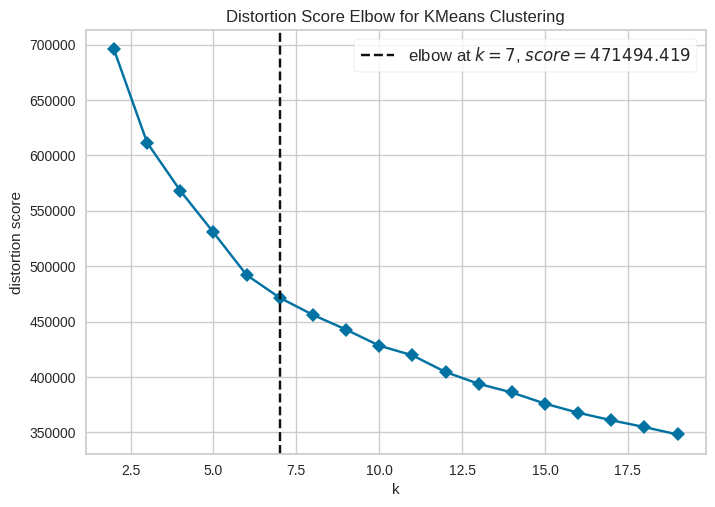

In [ ]:
# step 6 : Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X_train, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X_train)
    plt.title(title)
    visualizer.show()

perform_elbow_method(X_train, k_range=(2, 20), title='Elbow Method for Clustering')

In [ ]:
# Step 7: Build CBLOF model with k=6 clusters
model = CBLOF(n_clusters=7)
model.fit(X_train)

# Step 8: Obtain anomaly scores for test set
train_scores = model.decision_function(X_train)

# Step 9: Define threshold (e.g., 95th percentile of train scores)
threshold = np.percentile(train_scores, 95)

# Step 10: Obtain anomaly scores for test set
test_scores = model.decision_function(X_test)

# Step 11: Predicted labels based on threshold
predicted_labels = np.where(test_scores > threshold, 1, 0)

# Step 11: Count of predicted fraud and not fraud labels
count_predicted_fraud = np.sum(predicted_labels)
count_predicted_not_fraud = len(predicted_labels) - count_predicted_fraud

print("Count of predicted fraud:", count_predicted_fraud)
print("Count of predicted not fraud:", count_predicted_not_fraud)

Count of predicted fraud: 4050
Count of predicted not fraud: 12481


In [ ]:
test_conf_matrix = confusion_matrix(y_test, predicted_labels)
test_accuracy, test_recall, test_specificity, test_precision, test_f1, test_auc = calculate_metrics(test_conf_matrix)

print(f"Test Metrics:")
print(f"Test Confusion matrix: {test_conf_matrix}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test Specificity: {test_specificity}")
print(f"Test Precision: {test_precision}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC: {test_auc}")

Test Metrics:
Test Confusion matrix: [[8525  500]
 [3956 3550]]
Test Accuracy: 0.7304458290484545
Test Recall: 0.47295496935784703
Test Specificity: 0.9445983379501385
Test Precision: 0.8765432098765432
Test F1 Score: 0.6143994461751471
Test AUC: 0.7087766536539928
